## 1 Scipy

###1.1 File Input/Output: scipy.io

In [ ]:
import numpy as np
from scipy import io as spio
a = np.ones((3, 3))
spio.savemat('file.mat', {'a': a}) # savemat expects a dictionary
data = spio.loadmat('file.mat')
data['a']

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

###1.2Linear Algebra: scipy.linalg  : 선형대수함수  
단위행렬 (Unit matrix): np.eye(n)  
대각행렬 (Diagonal matrix): np.diag(x)  
내적 (Dot product, Inner product): np.dot(a, b)  
대각합 (Trace): np.trace(x)  
행렬식 (Matrix Determinant): np.linalg.det(x)  
역행렬 (Inverse of a matrix): np.linalg.inv(x)  
고유값 (Eigenvalue), 고유벡터 (Eigenvector): w, v = np.linalg.eig(x)  
특이값 분해 (Singular Value Decomposition): u, s, vh = np.linalg.svd(A)  
연립방정식 해 풀기 (Solve a linear matrix equation): np.linalg.solve(a, b)    
최소자승 해 풀기 (Compute the Least-squares solution): m, c = np.linalg.lstsq(A, y, rcond=None)[0]  


출처: https://rfriend.tistory.com/380 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

In [1]:
import numpy as np
from scipy import linalg
arr = np.array([[1, 2],[3, 4]])
linalg.det(arr)

-2.0

In [2]:
arr = np.array([[3, 2],[6, 4]])
linalg.det(arr)

0.0

In [ ]:
arr = np.array([[1, 2], [3, 4]])
iarr = linalg.inv(arr)
iarr

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [ ]:
np.allclose(np.dot(arr, iarr), np.eye(2))

True

### 1.3 특잇값 분해 (SVD):

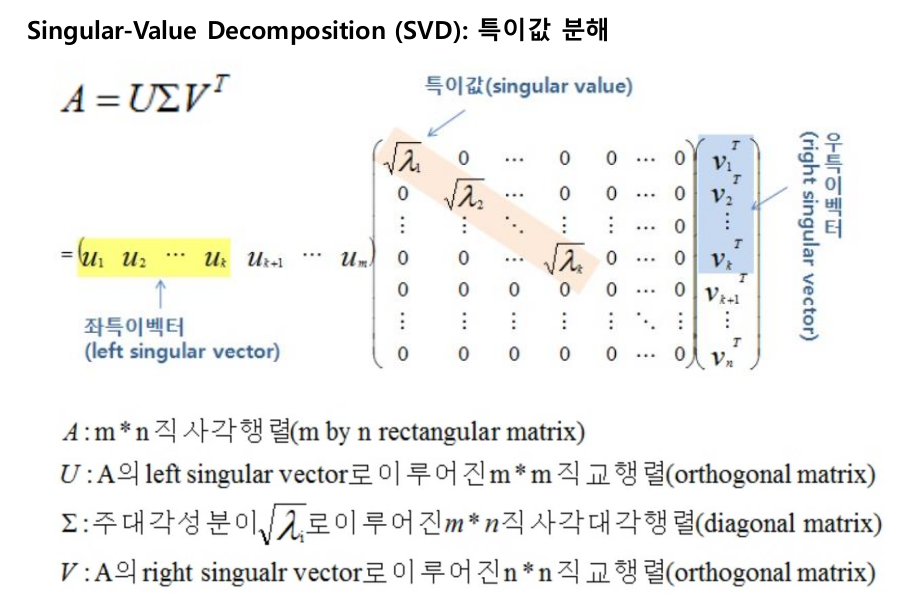

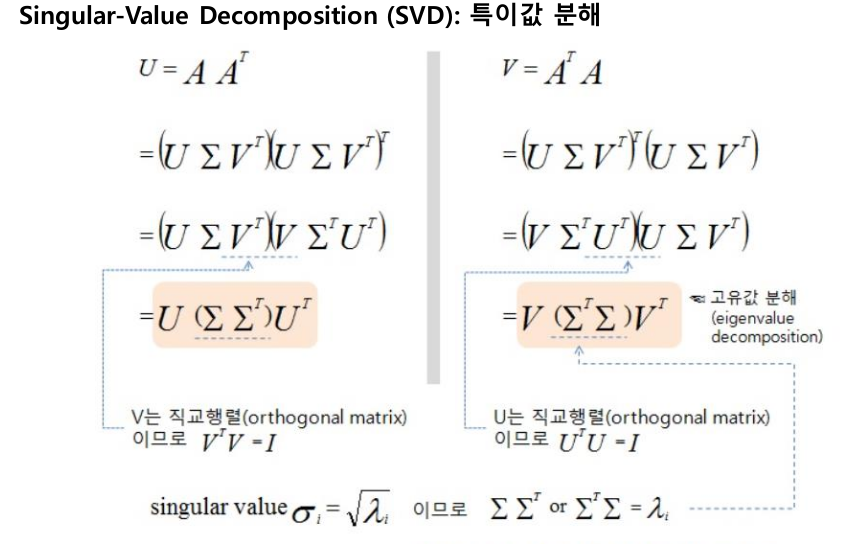

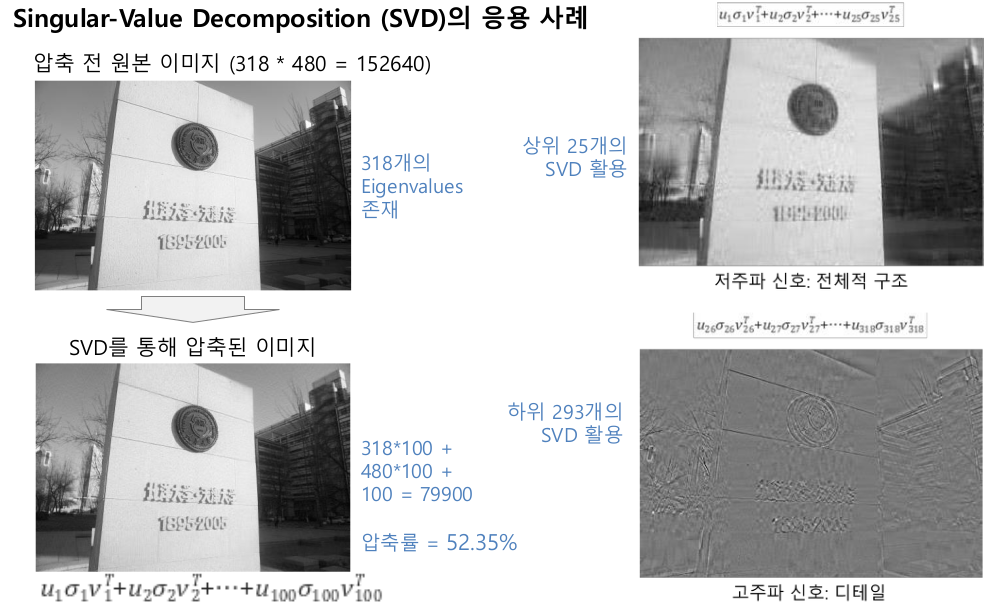

---



In [ ]:
arr = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])
arr

array([[1, 1, 2],
       [3, 4, 5],
       [6, 7, 9]])

In [ ]:
uarr, spec, vharr = linalg.svd(arr)
uarr, spec, vharr 

(array([[-0.1617463 , -0.98659196,  0.02178164],
        [-0.47456365,  0.09711667,  0.87484724],
        [-0.86523261,  0.13116653, -0.48390895]]),
 array([14.88982544,  0.45294236,  0.29654967]),
 array([[-0.45513179, -0.54511245, -0.70406496],
        [ 0.20258033,  0.70658087, -0.67801525],
        [-0.86707339,  0.45121601,  0.21115836]]))

In [ ]:
sarr = np.diag(spec)
svd_mat = uarr.dot(sarr).dot(vharr)
svd_mat

array([[1., 1., 2.],
       [3., 4., 5.],
       [6., 7., 9.]])

In [ ]:
np.allclose(svd_mat, arr)

True

### 1.4Interpolation: scipy.interpolate  
- 선형 근사도 

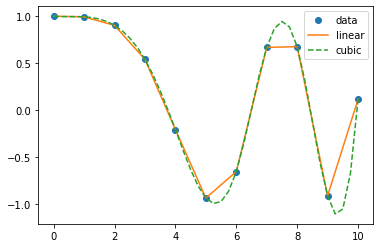

In [ ]:
%matplotlib inline

import numpy as np
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt

x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(0, 10, num=41, endpoint=True)

plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

#### interp1d의 근사점 제어 방법

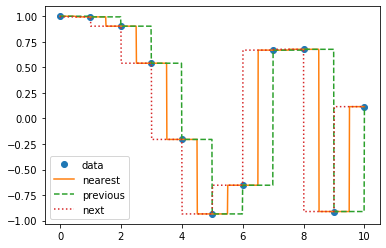

In [ ]:
%matplotlib inline

import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f1 = interp1d(x, y, kind='nearest')
f2 = interp1d(x, y, kind='previous')
f3 = interp1d(x, y, kind='next')

xnew = np.linspace(0, 10, num=1001, endpoint=True)
plt.plot(x, y, 'o')
plt.plot(xnew, f1(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), ':')
plt.legend(['data', 'nearest', 'previous', 'next'], loc='best')
plt.show()

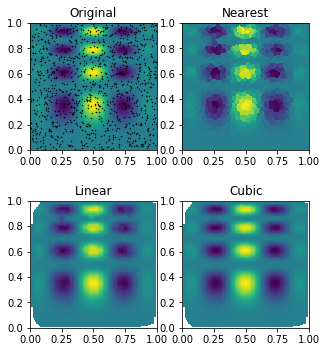

In [ ]:
%matplotlib inline

import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

def func(x, y):
     return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2
    
grid_x, grid_y = np.mgrid[0:1:101j, 0:1:201j]
points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])

grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')

plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
plt.title('Nearest')

plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')
plt.title('Linear')

plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')

plt.gcf().set_size_inches(5, 6)
plt.show()

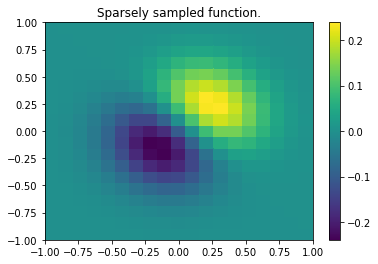

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x, y = np.mgrid[-1:1:20j, -1:1:20j]
z = (x+y) * np.exp(-6.0*(x*x + y*y))

plt.figure()
plt.pcolor(x, y, z)
plt.colorbar()
plt.title("Sparsely sampled function.")
plt.show()

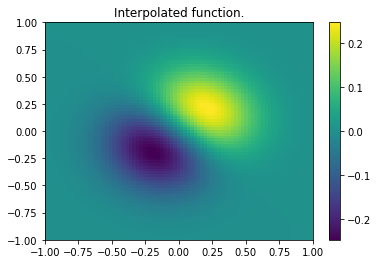

In [ ]:
from scipy import interpolate as itp

xnew, ynew = np.mgrid[-1:1:80j, -1:1:80j]
tck = itp.bisplrep(x, y, z, s=0)
znew = itp.bisplev(xnew[:,0], ynew[0,:], tck)

plt.figure()
plt.pcolor(xnew, ynew, znew)
plt.colorbar()
plt.title("Interpolated function.")
plt.show()

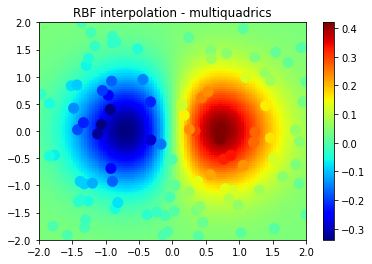

In [ ]:
%matplotlib inline

import numpy as np
from scipy.interpolate import Rbf
import matplotlib.pyplot as plt
from matplotlib import cm

# 2-d tests - setup scattered data
x = np.random.rand(100)*4.0-2.0 #중심이 zero
y = np.random.rand(100)*4.0-2.0 #중심이 zero
z = x*np.exp(-x**2-y**2)
ti = np.linspace(-2.0, 2.0, 100)
XI, YI = np.meshgrid(ti, ti)

# use RBF for interpolation
rbf = Rbf(x, y, z, epsilon=2)
ZI = rbf(XI, YI)

# plot the result
plt.subplot(1, 1, 1)
plt.pcolor(XI, YI, ZI, cmap=cm.jet)
plt.scatter(x, y, 100, z, cmap=cm.jet)
plt.title('RBF interpolation - multiquadrics')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.colorbar()

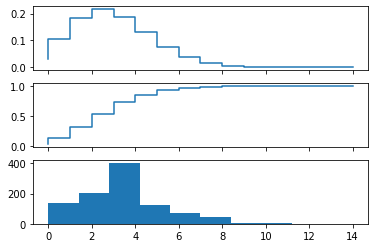

In [ ]:
%matplotlib inline

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# create a (discrete) random variable of poissionian distribution with mean = 3.5
X = stats.poisson(3.5) 
n = np.arange(0,15)

fig, axes = plt.subplots(3,1, sharex=True)
# plot the probability mass function (PMF)
axes[0].step(n, X.pmf(n))

# plot the commulative distribution function (CDF)
axes[1].step(n, X.cdf(n))

# plot histogram of 1000 random samples of the stochastic variable X
axes[2].hist(X.rvs(size=1000));

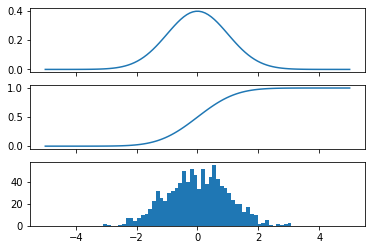

In [ ]:
%matplotlib inline

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# create a (continous) random variable of standard normal distribution
Y = stats.norm()
x = np.linspace(-5,5,100)

fig, axes = plt.subplots(3,1, sharex=True)

# plot the probability distribution function (PDF)
axes[0].plot(x, Y.pdf(x))

# plot the commulative distributin function (CDF)
axes[1].plot(x, Y.cdf(x))

# plot histogram of 1000 random samples of the stochastic variable Y
axes[2].hist(Y.rvs(size=1000), bins=50);

In [ ]:
import numpy as np 
import scipy.stats as stats 

np.random.seed(6) 
population_ages1 = stats.poisson.rvs(loc=18,mu=35,size=150000) 
population_ages2 = stats.poisson.rvs(loc=18,mu=10,size=100000) 
population_ages = np.concatenate((population_ages1,population_ages2)) 
gujarat_ages1 = stats.poisson.rvs(loc=18,mu=30,size=30) 
gujarat_ages2 = stats.poisson.rvs(loc=18,mu=10,size=20) 
gujarat_ages = np.concatenate((gujarat_ages1,gujarat_ages2)) 
population_ages.mean() 

43.000112

In [ ]:
gujarat_ages.mean() 

39.26

In [ ]:
stats.ttest_1samp(a=gujarat_ages,popmean=population_ages.mean()) 

Ttest_1sampResult(statistic=-2.5742714883655027, pvalue=0.013118685425061678)

In [ ]:
import numpy as np 
import scipy.stats as stats 

np.random.seed(12) 
maharashtra_ages1=stats.poisson.rvs(loc=18,mu=33,size=30) 
maharashtra_ages2=stats.poisson.rvs(loc=18,mu=13,size=20) 
maharashtra_ages=np.concatenate((maharashtra_ages1,maharashtra_ages2)) 
maharashtra_ages.mean() 

42.8

In [ ]:
import numpy as np 
import scipy.stats as stats 

np.random.seed(11) 
before=stats.norm.rvs(scale=30,loc=250,size=100) 
after=before+stats.norm.rvs(scale=5,loc=-1.25,size=100) 
weight_df=pd.DataFrame({"weight_before":before, 
                        "weight_after":after, 
                         "weight_change":after-before}) 
weight_df.describe() 

,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,250.345546,249.115171,-1.230375
std,28.132539,28.422183,4.783696
min,170.400443,165.913930,-11.495286
25%,230.421042,229.148236,-4.046211
50%,250.830805,251.134089,-1.413463
75%,270.637145,268.927258,1.738673
max,314.700233,316.720357,9.759282


In [ ]:
import numpy as np 
import scipy.stats as stats 

np.random.seed(8) 
x_data = stats.expon.rvs(scale=35, size=100) 
y_data = stats.norm.rvs(loc=50, scale=10, size=100) 

In [ ]:
stat_x0, p_x0 = stats.normaltest(x_data)
stat_y0, p_y0 = stats.normaltest(y_data)

In [ ]:
stat_x0, p_x0

(42.048082653502306, 7.402439464051159e-10)

In [ ]:
stat_y0, p_y0

(0.4108819497128746, 0.814288156624051)

In [ ]:
stat_x, p_x = stats.shapiro(x_data)
stat_y, p_y = stats.shapiro(y_data)

In [ ]:
stat_x, p_x

(0.8176348805427551, 8.947362295508299e-10)

In [ ]:
stat_y, p_y

(0.9877764582633972, 0.4918753206729889)

In [ ]:
result_x = stats.anderson(x_data)
result_y = stats.anderson(y_data)

In [ ]:
result_x

AndersonResult(statistic=5.261760230743292, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [ ]:
result_y

AndersonResult(statistic=0.24634350874069355, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [ ]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = [[43,9],[44,4]]
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof={}\nstatistics={}'.format(dof, stat))
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

[[43, 9], [44, 4]]
dof=1
statistics=1.0724852071005921
[[45.24  6.76]
 [41.76  6.24]]
probability=0.950, critical=3.841, stat=1.072
Independent (fail to reject H0)
significance=0.050, p=0.300
Independent (fail to reject H0)


In [ ]:
from scipy.stats import wasserstein_distance
wasserstein_distance([0, 1, 3], [5, 6, 8])

5.0

In [ ]:
wasserstein_distance([0, 1], [0, 1], [3, 1], [2, 2])

0.25

In [ ]:
wasserstein_distance([3.4, 3.9, 7.5, 7.8], [4.5, 1.4],
...                 [1.4, 0.9, 3.1, 7.2], [3.2, 3.5])

4.078133143804786

In [ ]:
wasserstein_distance([3.4, 3.9, 7.5, 7.8], [4.5, 1.4],
...                  [0.3, 0.2, 0.4, 0.1], [0.6, 0.4])

2.44

In [ ]:
wasserstein_distance([0.1, 0.3, 0.7, 0.9, 1.0], [0.3, 0.4, 0.5, 0.7, 1.0])

0.14

Wasserstein Distance = 0.30909


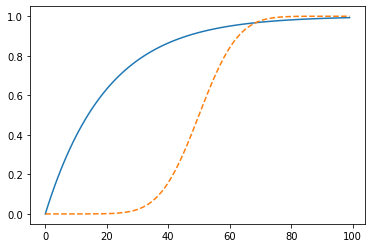

In [ ]:
%matplotlib inline

import numpy as np 
import scipy.stats as stats 
import matplotlib.pyplot as plt

x = np.arange(100)
expon_cdf = stats.expon.cdf(x, loc=0, scale=20) 
normal_cdf = stats.norm.cdf(x, loc=50, scale=10)
w_distance = wasserstein_distance(expon_cdf, normal_cdf)
print("Wasserstein Distance = %.5f" %w_distance)

# plot the cumulative distribution function (CDF)
plt.plot(x, expon_cdf, '-', x, normal_cdf, '--')
plt.show()

In [ ]:
import numpy as np
import statsmodels.api as sm

# Generate artificial data (2 regressors + constant)
nobs = 100
X = np.random.random((nobs, 2))
X = sm.add_constant(X)
beta = [1, .1, .5]
e = np.random.random(nobs)
y = np.dot(X, beta) + e

# Fit regression model
results = sm.OLS(y, X).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     16.99
Date:                Sun, 29 Sep 2019   Prob (F-statistic):           4.72e-07
Time:                        18:53:16   Log-Likelihood:                -16.422
No. Observations:                 100   AIC:                             38.84
Df Residuals:                      97   BIC:                             46.66
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4382      0.076     18.881      0.0

In [ ]:
import numpy as np

Const = X[:,0]; X0 = X[:,1]; Y0 = X[:,2]; Z0 = y
Z = 1.4382 * Const + 0.1474 * X0 + 0.5555 * Y0

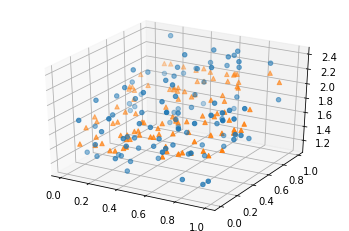

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

x1 = np.arange(0, 1, 0.1)
x2 = np.arange(0, 1, 0.1)
np.meshgrid(x1, x2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X0, Y0, Z0, marker='o')
ax.scatter(X0, Y0, Z, marker='^')
#ax.scatter(X0, Y0, Z-Z0, marker='*')
plt.show()

In [ ]:
from scipy.fftpack import fft, ifft 
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5]) 
y = fft(x) 
y

array([ 4.5       +0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
        2.08155948+1.65109876j])

In [ ]:
yinv = ifft(y) 
yinv 

array([ 1. +0.j,  2. +0.j,  1. +0.j, -1. +0.j,  1.5+0.j])

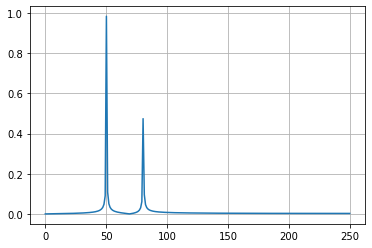

In [ ]:
%matplotlib inline

from scipy.fftpack import fft 
import matplotlib.pyplot as plt
import numpy as np

# Number of sample points 
N = 500
# sample spacing 
T = 1.0 / N
x = np.linspace(0.0, N*T, N) 
# 50Hz 와 80Hz에 신호
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x) 
yf = fft(y) 

xf = np.linspace(0.0, 1.0/(2.0*T), N//2) 
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2])) 
plt.grid() 
plt.show()

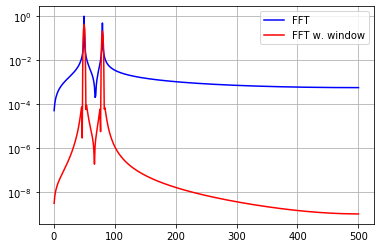

In [ ]:
from scipy.fftpack import fft

# Number of sample points
N = 1000
# sample spacing
T = 1.0 / 1000.0
x = np.linspace(0.0, N*T, N) 
# 50Hz 와 80Hz에 신호
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x) 
yf = fft(y) 

from scipy.signal import blackman
w = blackman(N)
ywf = fft(y*w)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

import matplotlib.pyplot as plt
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')
plt.legend(['FFT', 'FFT w. window'])
plt.grid()
plt.show()

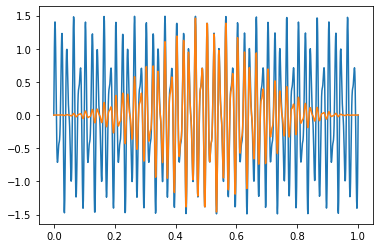

In [ ]:
plt.plot(x, y) 
plt.plot(x, y*w) #blackman windowing

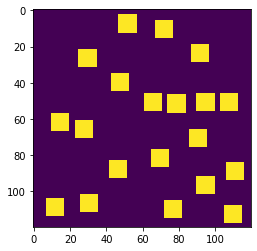

In [ ]:
%matplotlib inline

import numpy as np
import pylab

# image size, square side length, number of squares
ncols, nrows = 120, 120
sq_size, nsq = 10, 20

# The image array (0=background, 1=square) and boolean array of allowed places
# to add a square so that it doesn't touch another or the image sides
image = np.zeros((nrows, ncols))
sq_locs = np.zeros((nrows, ncols), dtype=bool)
sq_locs[1:-sq_size-1:,1:-sq_size-1] = True

def place_square():
    """ Place a square at random on the image and update sq_locs. """
    # valid_locs is an array of the indices of True entries in sq_locs
    valid_locs = np.transpose(np.nonzero(sq_locs))
    # pick one such entry at random, and add the square so its top left
    # corner is there; then update sq_locs
    i, j = valid_locs[np.random.randint(len(valid_locs))]
    image[i:i+sq_size, j:j+sq_size] = 1
    imin, jmin = max(0,i-sq_size-1), max(0, j-sq_size-1)
    sq_locs[imin:i+sq_size+1, jmin:j+sq_size+1] = False

# Add the required number of squares to the image
for i in range(nsq):
    place_square()
pylab.imshow(image)
pylab.show()

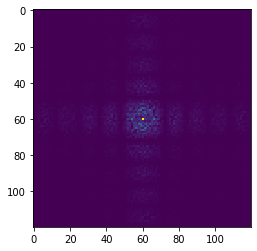

In [ ]:
# Take the 2-dimensional DFT and centre the frequencies
ftimage = np.fft.fft2(image)
ftimage = np.fft.fftshift(ftimage)
pylab.imshow(np.abs(ftimage))
pylab.show()

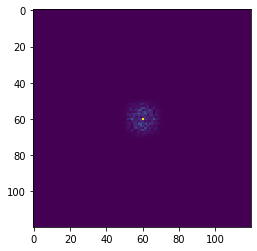

In [ ]:
# Build and apply a Gaussian filter.
sigmax, sigmay = 10, 10
cy, cx = nrows/2, ncols/2
x = np.linspace(0, nrows, nrows)
y = np.linspace(0, ncols, ncols)
X, Y = np.meshgrid(x, y)
gmask = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))

ftimagep = ftimage * gmask
pylab.imshow(np.abs(ftimagep))
pylab.show()

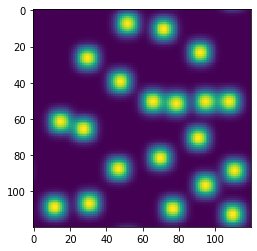

In [ ]:
# Finally, take the inverse transform and show the blurred image
imagep = np.fft.ifft2(ftimagep)
pylab.imshow(np.abs(imagep))
pylab.show()

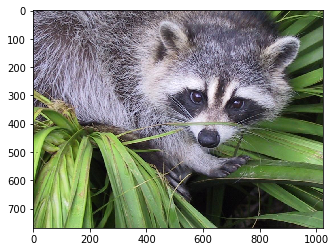

In [ ]:
from scipy import misc
import imageio as imio
f = misc.face()
imio.imwrite('face.png', f) # uses the Image module (PIL)

import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()

In [ ]:
import imageio as imio
face = imio.imread('face.png')
type(face),face.shape, face.dtype

(imageio.core.util.Array, (768, 1024, 3), dtype('uint8'))

In [ ]:
face.tofile('face.raw') # Create raw file
face_from_raw = np.fromfile('face.raw', dtype=np.uint8)
face_from_raw.shape

(2359296,)

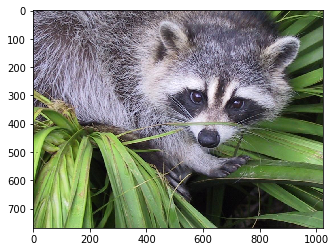

In [ ]:
face_from_raw.shape = (768, 1024, 3)
face_memmap = np.memmap('face.raw', dtype=np.uint8, shape=(768, 1024, 3))
plt.imshow(face_memmap)
plt.show()

In [ ]:
f = misc.face()
f.shape

(768, 1024, 3)

In [ ]:
face_memmap.shape

(768, 1024, 3)

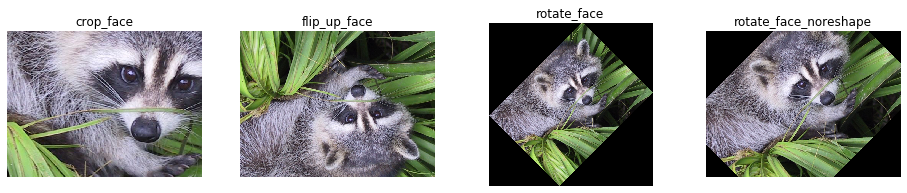

In [ ]:
from scipy import ndimage
lx, ly, Ic = face_memmap.shape
# Cropping
crop_face = face_memmap[lx // 4: - lx // 4, ly // 4: - ly // 4]
# up <-> down flip
flip_up_face = np.flipud(face_memmap)
# rotation
rotate_face = ndimage.rotate(face_memmap, 45)
rotate_face_noreshape = ndimage.rotate(face_memmap, 45, reshape=False)

fig = plt.figure(figsize=(16, 3))
ax1 = fig.add_subplot(1, 4, 1)
ax1.imshow(crop_face)
ax1.axis("off")
ax1.set_title('crop_face')
ax2 = fig.add_subplot(1, 4, 2)
ax2.imshow(flip_up_face)
ax2.axis("off")
ax2.set_title('flip_up_face')
ax3 = fig.add_subplot(1, 4, 3)
ax3.imshow(rotate_face)
ax3.axis("off")
ax3.set_title('rotate_face')
ax4 = fig.add_subplot(1, 4, 4)
ax4.imshow(rotate_face_noreshape)
ax4.axis("off")
ax4.set_title('rotate_face_noreshape')
plt.show()

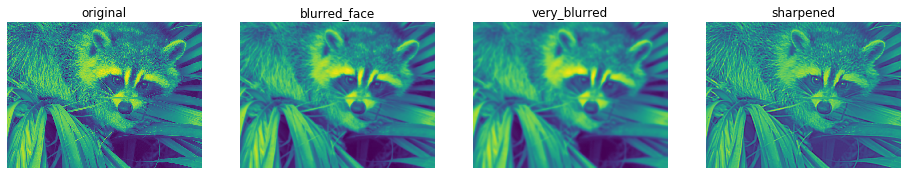

In [ ]:
from scipy import misc
face = misc.face(gray=True)
blurred_face = ndimage.gaussian_filter(face, sigma=3)
very_blurred = ndimage.gaussian_filter(face, sigma=5)
face2 = face.astype(float)
blurred_f = ndimage.gaussian_filter(face2, 3)
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
alpha = 30
sharpened = blurred_face + alpha * (blurred_f - filter_blurred_f)

fig = plt.figure(figsize=(16, 3))
ax1 = fig.add_subplot(1, 4, 1)
ax1.imshow(face)
ax1.axis("off")
ax1.set_title('original')
ax2 = fig.add_subplot(1, 4, 2)
ax2.imshow(blurred_face)
ax2.axis("off")
ax2.set_title('blurred_face')
ax3 = fig.add_subplot(1, 4, 3)
ax3.imshow(very_blurred )
ax3.axis("off")
ax3.set_title('very_blurred')
ax4 = fig.add_subplot(1, 4, 4)
ax4.imshow(sharpened)
ax4.axis("off")
ax4.set_title('sharpened')
plt.show()

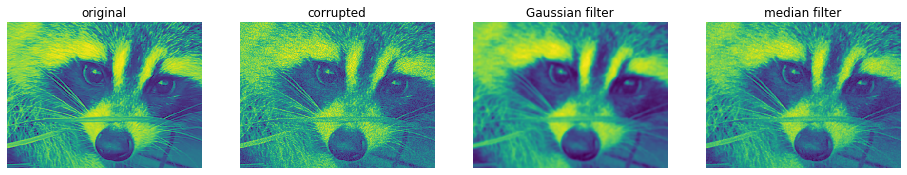

In [ ]:
from scipy import misc
f = misc.face(gray=True)
f = f[200:500, 400:800]
noisy = f + 0.8 * f.std() * np.random.random(f.shape)
# A Gaussian filter smoothes the noise out. . . and the edges as well:
gauss_denoised = ndimage.gaussian_filter(noisy, 2)
# A median filter preserves better the edges:
med_denoised = ndimage.median_filter(noisy, 3)

fig = plt.figure(figsize=(16, 3))
ax1 = fig.add_subplot(1, 4, 1)
ax1.imshow(f)
ax1.axis("off")
ax1.set_title('original')
ax2 = fig.add_subplot(1, 4, 2)
ax2.imshow(noisy)
ax2.axis("off")
ax2.set_title('corrupted')
ax3 = fig.add_subplot(1, 4, 3)
ax3.imshow(gauss_denoised)
ax3.axis("off")
ax3.set_title('Gaussian filter')
ax4 = fig.add_subplot(1, 4, 4)
ax4.imshow(med_denoised)
ax4.axis("off")
ax4.set_title('median filter')
plt.show()